In [4]:
import numpy as np
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
import scipy.stats as ss

In [5]:
import csv
import os

In [6]:
df=pd.read_csv("J:\paypal\insurance.csv")
df.head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
Agency                  63326 non-null object
Agency Type             63326 non-null object
Distribution Channel    63326 non-null object
Product Name            63326 non-null object
Claim                   63326 non-null object
Duration                63326 non-null int64
Destination             63326 non-null object
Net Sales               63326 non-null float64
Commision (in value)    63326 non-null float64
Gender                  18219 non-null object
Age                     63326 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


So, there are 4 numerical columns and 7 categorical columns

Now, lets check which columns have the null values

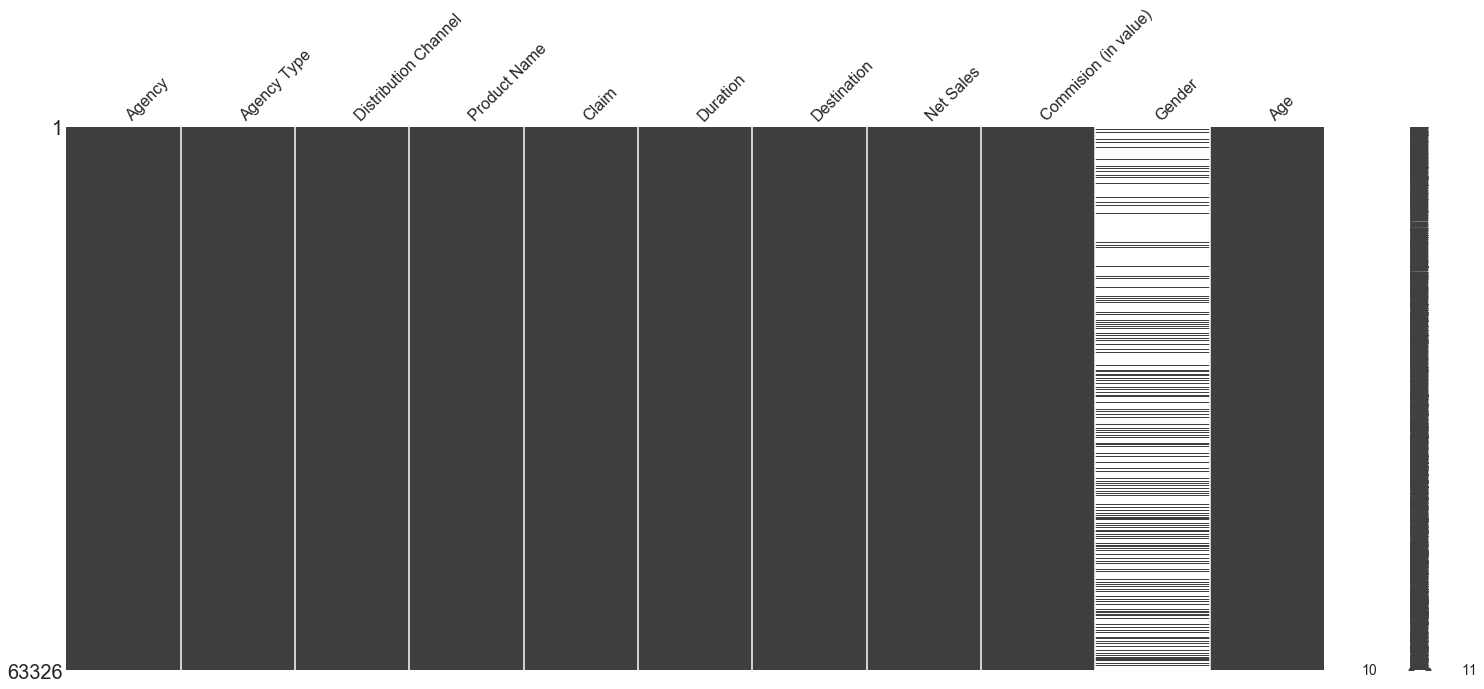

In [130]:
missingno.matrix(df)

"Black" in the data depicts the column is fill with data and "White" depicts they have null values in that particular area

So, we can conclude that only "Gender" have the null values and it has high number of null values

Lets see whats the number of null values in the "Gender" column

In [8]:
df['Gender'].isnull().sum()

45107

45107/63326 are null values, nearly 72% data in the column are null values.
Delete the null values with another category called "Unknown"

In [9]:
df.fillna('Unknown',inplace=True)

In [10]:
df.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
dtype: int64

There is no null values now

First make an another dataframe which consist of only numerical columns from df

In [11]:
df_numerical=df._get_numeric_data()
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 4 columns):
Duration                63326 non-null int64
Net Sales               63326 non-null float64
Commision (in value)    63326 non-null float64
Age                     63326 non-null int64
dtypes: float64(2), int64(2)
memory usage: 1.9 MB


Now lets look at the spread of the numerical data

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


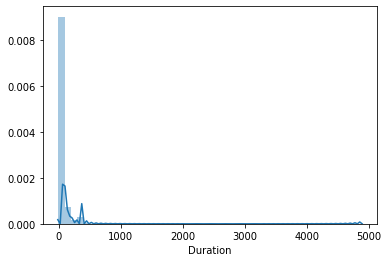

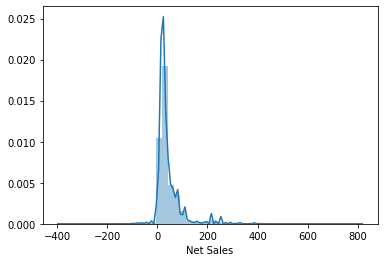

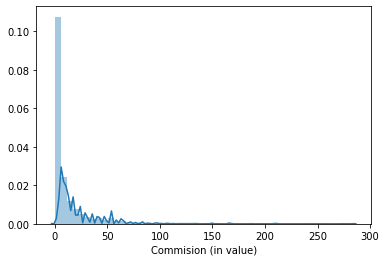

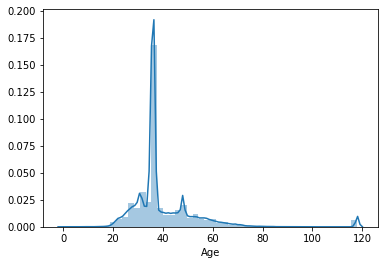

In [10]:
for i, col in enumerate(df_numerical.columns):
    plt.figure(i)
    sns.distplot(df_numerical[col])

From the graph we can conclude:

Duration: Data in this column is highly right skewed.

Net Sales and Commison: These both column seems to related but the graph plot shows disparency as low net sales shows high commison which is not pratically possible.

Age: Age is random so its distribution can be random.

Lets check the data in "Duration" column

In [12]:
df['Duration'].describe()

count    63326.000000
mean        49.317074
std        101.791566
min         -2.000000
25%          9.000000
50%         22.000000
75%         53.000000
max       4881.000000
Name: Duration, dtype: float64

We have negative values in this Duration column but can time be negative? NO

Lets see how many negative values we have in Duration column

In [13]:
df11=df['Duration']<0
df11.sum()

5

So, there are 5 negative values in Duration column. I am gonna replace those with the mean value

In [14]:
df.loc[df['Duration'] < 0, 'Duration'] = 49.317

We have also checked that some columns have low Net Sales but High Commission but that is not possible

Let us see how many such columns we have in our dataset

In [15]:
df12 = df['Net Sales']<df['Commision (in value)']
df12.sum()

2014

We gonna make all comission value 0 where net sales is 0.

In [16]:
df.loc[df['Net Sales'] == 0.0, 'Commision (in value)'] = 0

In [17]:
df[df["Age"] > 100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 10 to 63183
Data columns (total 11 columns):
Agency                  984 non-null object
Agency Type             984 non-null object
Distribution Channel    984 non-null object
Product Name            984 non-null object
Claim                   984 non-null object
Duration                984 non-null float64
Destination             984 non-null object
Net Sales               984 non-null float64
Commision (in value)    984 non-null float64
Gender                  984 non-null object
Age                     984 non-null int64
dtypes: float64(3), int64(1), object(7)
memory usage: 92.2+ KB


In [18]:
df.loc[df['Age'] > 100, 'Age'] = 40

In [19]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.321062,40.702018,9.225666,38.757967
std,101.790576,48.845637,19.389786,10.019790
min,0.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,10.500000,42.000000
max,4881.000000,810.000000,283.500000,88.000000


In [20]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186.0,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186.0,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65.0,AUSTRALIA,-49.5,29.70,Unknown,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60.0,AUSTRALIA,-39.6,23.76,Unknown,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79.0,ITALY,-19.8,11.88,Unknown,41


In [21]:
df['Claim'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
def claims(c):
    if c == "Yes":
        return 1
    elif c == "No":
        return 0

df["Claim"] = df.loc[:,'Claim'].apply(claims)

We will check how the data is spread according to the below conditions

In [158]:
df.groupby(["Agency"]).mean()

,Claim,Duration,Net Sales,Commision (in value),Age
Agency,,,,,
ADM,0.000000,54.914634,53.256098,31.155366,22.853659
ART,0.003021,30.359517,28.691601,10.261752,46.410876
C2B,0.066167,95.219910,78.865811,20.094789,37.749244
CBH,0.009901,91.950495,27.168317,9.344554,57.128713
CCR,0.015464,62.809278,30.654639,10.116031,48.675258
CSR,0.011628,79.895349,32.802326,10.824767,57.511628
CWT,0.010023,41.450350,43.040769,28.928769,40.273660
EPX,0.005553,39.158860,32.564993,0.000000,36.844899
JWT,0.005340,29.371162,53.012016,21.553004,40.000000


In [159]:
df.groupby(['Agency Type']).mean()

,Claim,Duration,Net Sales,Commision (in value),Age
Agency Type,,,,,
Airlines,0.033855,67.743460,53.015767,15.203356,41.008249
Travel Agency,0.007325,42.309795,36.015604,6.950654,37.901546


In [160]:
df.groupby(['Distribution Channel']).mean()

,Claim,Duration,Net Sales,Commision (in value),Age
Distribution Channel,,,,,
Offline,0.015357,80.495032,36.657281,8.872836,49.488708
Online,0.014626,48.766415,40.773982,9.231944,38.567045


In [23]:
claimed = df[df["Claim"]==1]

Dataset is highly imbalances.Claimed policies are 927. However, Not Claimed policies are 62399.

In [24]:
print("Claimed:",df[df["Claim"] == 1]["Claim"].count())
print("Not Claimed :",df[df["Claim"] == 0]["Claim"].count())

Claimed: 927
Not Claimed : 62399


Different policy plans have different coverage. Some of plans cover most of types of injury or disease, so the possibility of claims. Also it shows the percentage of claims. Annual silver plan has the highest claim percentage

In [25]:
a = pd.DataFrame(df.loc[:, "Product Name"].value_counts())
b = pd.DataFrame(claimed.loc[:, "Product Name"].value_counts())
c = (b / a) * 100
combined = a.join(b, lsuffix = "_subscribed", rsuffix = "_claimed")
combined1 = combined.join(c,rsuffix = "_percentage")
combined1.fillna(0, inplace = True)
combined1

,Product Name_subscribed,Product Name_claimed,Product Name
Cancellation Plan,18630,44.0,0.236178
2 way Comprehensive Plan,13158,142.0,1.079191
Rental Vehicle Excess Insurance,8580,86.0,1.002331
Basic Plan,5469,23.0,0.420552
Bronze Plan,4049,210.0,5.186466
1 way Comprehensive Plan,3331,9.0,0.270189
Value Plan,2715,19.0,0.699816
Silver Plan,2249,141.0,6.269453
Annual Silver Plan,1423,157.0,11.033029
Ticket Protector,1056,7.0,0.662879


The following visualization is to understand whether claimed policies happens in few of countries. 
If an abudunce in one of countries means that this country might have some of unavoidable situtation that lead to 
injury or disease.

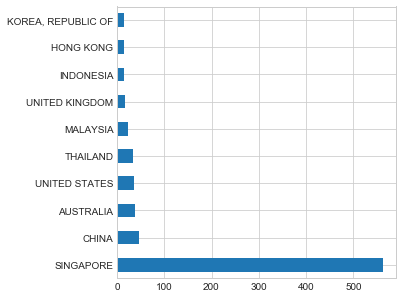

In [170]:
claimed['Destination'].value_counts().head(10).plot(kind='barh', figsize=(5,5))

In the below graph, we want to discover whether specific agency companies lead to an increase in the numbers of claimed policies.Eg. EPX has more sold policies, but it does not lead to more claimed policies, rather C2B has more claimed ones 

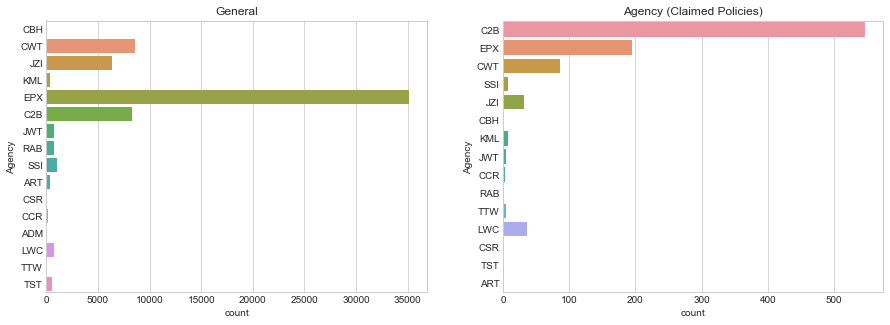

In [171]:
f, axes = plt.subplots(1, 2)
f.set_size_inches(15,5)
axes[0].set_title('General')
axes[1].set_title('Agency (Claimed Policies)')
sns.countplot(y="Agency", data=df, ax = axes[0])
sns.countplot(y="Agency", data=claimed, ax = axes[1])

Checking distribution of categorical columns in the dataset

Text(0.5, 1.0, 'Gender')

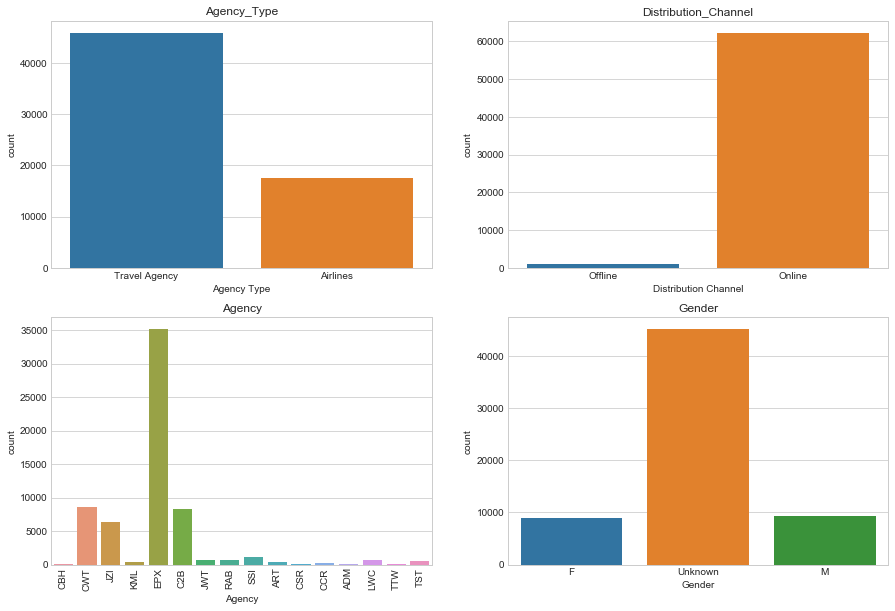

In [184]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(df['Agency Type'])
plt.title('Agency_Type')
plt.subplot(2,2,2)
sns.countplot(df['Distribution Channel'])
plt.title('Distribution_Channel')

plt.subplot(2,2,3)
sns.countplot(df['Agency'])
plt.title('Agency')
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.countplot(df['Gender'])
plt.title('Gender')

Pair plots showing the relationships of the categorical features wrt to the target variable

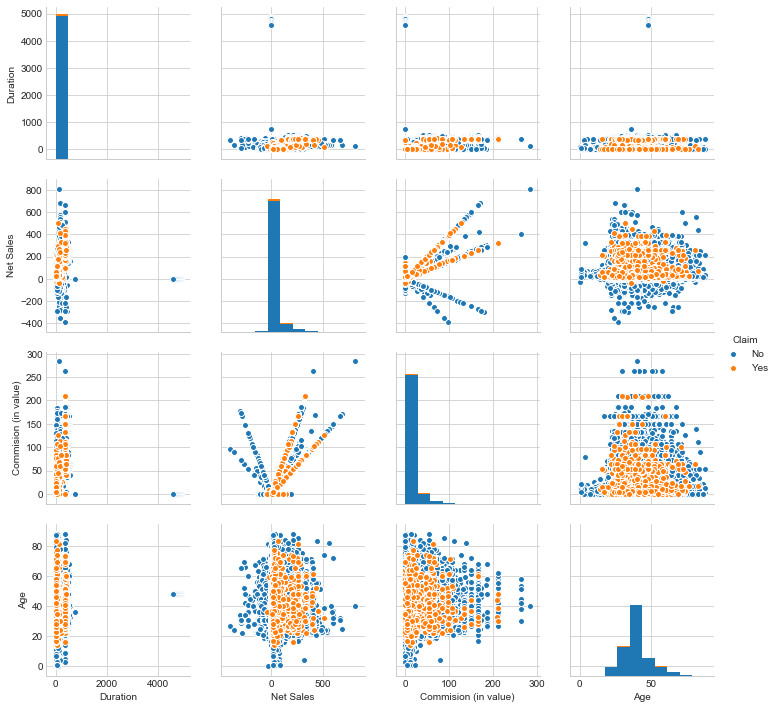

In [155]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Claim");
plt.show()

From the above we can come to below conclusions:

Here we clearly see that Commision and Net Values are corelated and distributions look same (linearlly distributed).
So we can drop any of the feature 'Commision' or 'Net Sales'. So that it should not effect the Model.
Also there won't be a -Ve values in Net Sales Amount. Might be outliers, these should be removed.
We observe ~20% of insured are in 35-40 Age.

In [26]:
df1 = df.drop('Claim',axis=1)
df1

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,186.0,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,186.0,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,65.0,AUSTRALIA,-49.5,29.70,Unknown,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,60.0,AUSTRALIA,-39.6,23.76,Unknown,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,79.0,ITALY,-19.8,11.88,Unknown,41
...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,111.0,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,58.0,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,2.0,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,3.0,VIET NAM,18.0,6.30,M,63


Distribution of age in dataset

(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 7 Text xticklabel objects>)

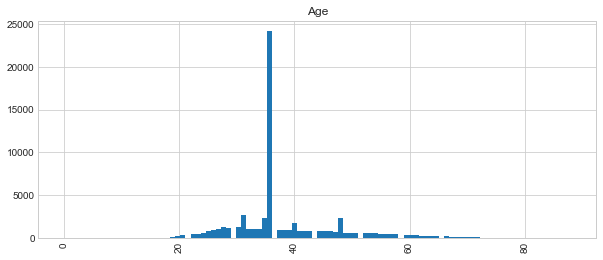

In [185]:
plt.figure(figsize = (10,4))
plt.hist(df['Age'],bins=100)
plt.title('Age')
plt.xticks(rotation=90)

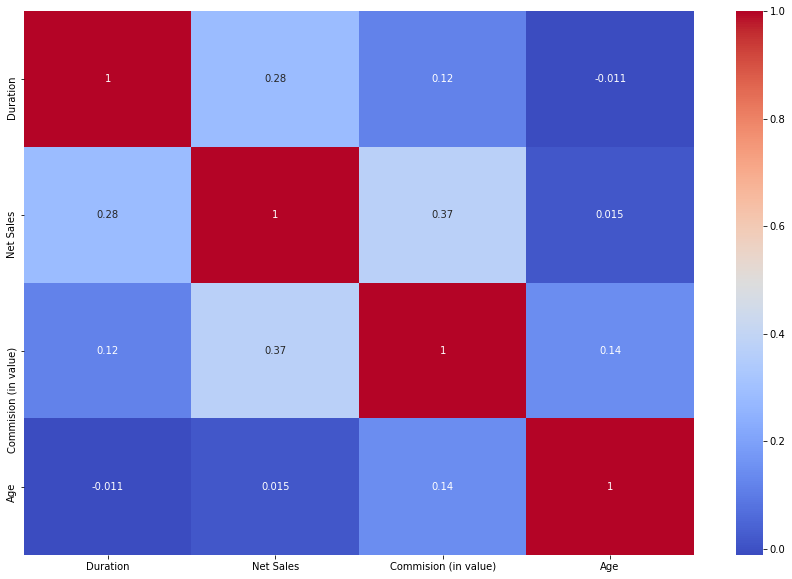

In [80]:
#check correlation
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(method='spearman'),annot=True,cmap='coolwarm')

In [27]:
df[df['Net Sales'] < 0 ].count() 

Agency                  678
Agency Type             678
Distribution Channel    678
Product Name            678
Claim                   678
Duration                678
Destination             678
Net Sales               678
Commision (in value)    678
Gender                  678
Age                     678
dtype: int64

In [36]:
# df.drop((df['Net Sales'] < 0,axis=0),inplace=True)
df.drop(df[df['Net Sales'] < 0].index, inplace = True)

In [37]:
df[df['Net Sales'] < 0 ].count() 

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

In [38]:
df[df['Duration'] < 0 ].count() 

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

In [39]:
df = df.drop('Gender',axis=1)

KeyError: "['Gender'] not found in axis"

In [30]:
df = df.drop('Net Sales',axis=1)

In [40]:
dest=df['Destination'].value_counts()
dest=dict(dest[:25])
dest=dest.keys()
df.loc[~df.Destination.isin(dest), 'Destination'] = 'Others'
dest=df['Destination'].value_counts()
print(dest)

SINGAPORE                    13177
MALAYSIA                      5877
THAILAND                      5856
CHINA                         4767
Others                        4007
AUSTRALIA                     3579
INDONESIA                     3441
UNITED STATES                 2486
PHILIPPINES                   2476
HONG KONG                     2404
INDIA                         2236
JAPAN                         2034
VIET NAM                      1665
KOREA, REPUBLIC OF            1465
UNITED KINGDOM                1271
TAIWAN, PROVINCE OF CHINA     1081
MYANMAR                        805
BRUNEI DARUSSALAM              778
NEW ZEALAND                    525
CANADA                         510
CAMBODIA                       492
FRANCE                         466
GERMANY                        446
ITALY                          436
NETHERLANDS                    368
Name: Destination, dtype: int64


In [41]:
df.Destination.describe()

count         62648
unique           25
top       SINGAPORE
freq          13177
Name: Destination, dtype: object

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62648 entries, 21 to 63325
Data columns (total 10 columns):
Agency                  62648 non-null object
Agency Type             62648 non-null object
Distribution Channel    62648 non-null object
Product Name            62648 non-null object
Claim                   62648 non-null int64
Duration                62648 non-null float64
Destination             62648 non-null object
Net Sales               62648 non-null float64
Commision (in value)    62648 non-null float64
Age                     62648 non-null int64
dtypes: float64(3), int64(2), object(5)
memory usage: 5.3+ MB


In [43]:
df_onehot = df.copy()
df_onehot = pd.get_dummies(df_onehot, columns=['Agency','Agency Type','Distribution Channel','Product Name','Destination'])
print(df_onehot.head())

    Claim  Duration  Net Sales  Commision (in value)  Age  Agency_ADM  \
21      0      12.0      46.15                 11.54   44           0   
22      0       7.0      17.55                  4.39   25           0   
23      1      12.0      94.00                 23.50   34           0   
24      0     190.0     294.75                 73.69   26           0   
25      0     364.0     389.00                 97.25   30           0   

    Agency_ART  Agency_C2B  Agency_CBH  Agency_CCR  ...  \
21           0           1           0           0  ...   
22           0           1           0           0  ...   
23           0           1           0           0  ...   
24           0           1           0           0  ...   
25           0           1           0           0  ...   

    Destination_NETHERLANDS  Destination_NEW ZEALAND  Destination_Others  \
21                        0                        0                   0   
22                        0                        0  

In [44]:
df_onehot.head()

,Claim,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,...,Destination_NETHERLANDS,Destination_NEW ZEALAND,Destination_Others,Destination_PHILIPPINES,Destination_SINGAPORE,"Destination_TAIWAN, PROVINCE OF CHINA",Destination_THAILAND,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_VIET NAM
21,0,12.0,46.15,11.54,44,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
22,0,7.0,17.55,4.39,25,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
23,1,12.0,94.00,23.50,34,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
24,0,190.0,294.75,73.69,26,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
25,0,364.0,389.00,97.25,30,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [45]:
print("Claimed:",df[df["Claim"] == 1]["Claim"].count())
print("Not Claimed :",df[df["Claim"] == 0]["Claim"].count())

Claimed: 924
Not Claimed : 61724


In [46]:
X = df_onehot.drop('Claim',axis=1)
X.head()

,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_NETHERLANDS,Destination_NEW ZEALAND,Destination_Others,Destination_PHILIPPINES,Destination_SINGAPORE,"Destination_TAIWAN, PROVINCE OF CHINA",Destination_THAILAND,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_VIET NAM
21,12.0,46.15,11.54,44,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
22,7.0,17.55,4.39,25,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
23,12.0,94.00,23.50,34,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
24,190.0,294.75,73.69,26,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
25,364.0,389.00,97.25,30,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [47]:
y = df_onehot.Claim
y.head()

21    0
22    0
23    1
24    0
25    0
Name: Claim, dtype: int64

In [48]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV

In [49]:
log_class = LogisticRegression()
grid={'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [51]:
X_train.shape

(43853, 75)

In [52]:
y_train.shape

(43853,)

In [53]:
X_test.shape

(18795, 75)

In [54]:
y_test.shape

(18795,)

In [55]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.4961394         nan 0.49616835        nan 0.49617413
        nan 0.49616835        nan 0.49617413]
  category=UserWarning
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [56]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[18536     1]
 [  258     0]]
0.986219739292365
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18537
           1       0.00      0.00      0.00       258

    accuracy                           0.99     18795
   macro avg       0.49      0.50      0.50     18795
weighted avg       0.97      0.99      0.98     18795



In [57]:
class_weight=dict({0:1,1:100})

In [58]:
ran_forest = RandomForestClassifier(class_weight=class_weight)
ran_forest.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [59]:
y_pred=ran_forest.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[18446    91]
 [  252     6]]
0.9817504655493482
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18537
           1       0.06      0.02      0.03       258

    accuracy                           0.98     18795
   macro avg       0.52      0.51      0.51     18795
weighted avg       0.97      0.98      0.98     18795



Under Sampling 

In [60]:
from collections import Counter
Counter(y_train)

Counter({0: 43187, 1: 666})

In [61]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.7)
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)
print("The number of class before fit {}".format(Counter(y_train)))
print("The number of class after fit {}".format(Counter(y_train_ns)))

C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\imblearn\utils\_validation.py:591: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


The number of class before fit Counter({0: 43187, 1: 666})
The number of class after fit Counter({0: 951, 1: 666})


In [62]:
ran_forest = RandomForestClassifier()
ran_forest.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [63]:
y_pred=ran_forest.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 3867 14670]
 [   44   214]]
0.21713221601489757
              precision    recall  f1-score   support

           0       0.99      0.21      0.34     18537
           1       0.01      0.83      0.03       258

    accuracy                           0.22     18795
   macro avg       0.50      0.52      0.19     18795
weighted avg       0.98      0.22      0.34     18795



Over Sampling

In [66]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [64]:
from imblearn.over_sampling import RandomOverSampler

In [68]:
oss=RandomOverSampler(0.75)
X_train_ns,y_train_ns=oss.fit_resample(X_train,y_train)
print("The number of class before fit {}".format(Counter(y_train)))
print("The number of class after fit {}".format(Counter(y_train_ns)))

C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\imblearn\utils\_validation.py:591: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


The number of class before fit Counter({0: 43187, 1: 666})
The number of class after fit Counter({0: 43187, 1: 32390})


In [69]:
ran_forest = RandomForestClassifier()
ran_forest.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [70]:
y_pred=ran_forest.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[18337   200]
 [  239    19]]
0.9766427241287576
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18537
           1       0.09      0.07      0.08       258

    accuracy                           0.98     18795
   macro avg       0.54      0.53      0.53     18795
weighted avg       0.97      0.98      0.98     18795



SMOTE

In [71]:
from imblearn.combine import SMOTETomek

In [72]:
sm=SMOTETomek(0.5)
X_train_ns,y_train_ns=sm.fit_resample(X_train,y_train)
print("The number of class before fit {}".format(Counter(y_train)))
print("The number of class after fit {}".format(Counter(y_train_ns)))

C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\imblearn\utils\_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


The number of class before fit Counter({0: 43187, 1: 666})
The number of class after fit Counter({0: 42826, 1: 21232})


In [73]:
ran_forest = RandomForestClassifier()
ran_forest.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [74]:
y_pred=ran_forest.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[18220   317]
 [  236    22]]
0.9705772811918063
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     18537
           1       0.06      0.09      0.07       258

    accuracy                           0.97     18795
   macro avg       0.53      0.53      0.53     18795
weighted avg       0.97      0.97      0.97     18795

